In [154]:
#Importing the required libraries.
import pandas as pd #for dataframes and reading csv files.
import numpy as np # for math operations(sqrt)
import matplotlib.pyplot as plt #for plotting the graphs



In [155]:
file_day_od="data/day_od.csv" #directory of the file(file_path)
#csv (comma seperated values, delimiter is comma)
data_day_od=pd.read_csv(file_day_od,sep=",",encoding='utf-16', header=0)
                       
#quoting=2,quotechar='"',escapechar='\r' )
#comment: explicit header=0 to replace column names;  quoting=2 "Non-Numerical"; es

#seperate the columns by name
headerName=["MONTH","DOW","ORIGIN","DESTINATION","CUST_CLASS","COD_COUNTRY","COD_PRO","PRO_COM","FLOW"]
data_day_od.columns=headerName
day_od=pd.DataFrame(data_day_od)#dataFrame of the file(can be read more easily than csv)

day_od.head()

data_day_od

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW
0,Marzo,Domenica,108,300,visitor,222,28.0,-999.0,493
1,Maggio,Lunedì,300,101,visitor,222,93.0,-999.0,58
2,Febbraio,Sabato,108,207,visitor,222,28.0,-999.0,39
3,Aprile,Venerdì,109,121,resident,222,28.0,28060.0,106
4,Maggio,Giovedì,300,120,visitor,222,28.0,28103.0,136
...,...,...,...,...,...,...,...,...,...
193496,Febbraio,Martedì,205,120,Altro,-999,-999.0,-999.0,32
193497,Marzo,Giovedì,214,115,Altro,-999,-999.0,-999.0,32
193498,Febbraio,Giovedì,124,121,Altro,-999,-999.0,-999.0,40
193499,Aprile,Domenica,110,300,visitor,222,28.0,28086.0,36


In [156]:
# Getting DataFrame for distinct_users_day.csv
file_distinct_users_day="data/distinct_users_day.csv"
data_distinct_users_day=pd.read_csv(file_distinct_users_day,sep=",",encoding="latin-1")
                                    #,quoting=3,escapechar="\"",encoding="latin-1")
distinct_users_day=pd.DataFrame(data_distinct_users_day)
distinct_users_day



,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS
0,Mercoledì,visitor,222.0,35.0,35033.0,968
1,Lunedì,visitor,222.0,22.0,22098.0,64
2,Domenica,visitor,222.0,52.0,52032.0,516
3,Giovedì,visitor,222.0,108.0,108009.0,128
4,Giovedì,visitor,222.0,29.0,29048.0,512
...,...,...,...,...,...,...
12840,Mercoledì,foreigner,259.0,NaN,NaN,176
12841,Sabato,foreigner,602.0,NaN,NaN,164
12842,Giovedì,foreigner,732.0,NaN,NaN,80
12843,Giovedì,foreigner,297.0,NaN,NaN,80


In [157]:
# Getting DataFrame for codici_istat_comune.csv
file_codici_istat_comune="data/codici_istat_comune.csv"
data_codici_istat_comune=pd.read_csv(file_codici_istat_comune,sep=",",delimiter=',',header=0,quoting=3,escapechar="\"",encoding="latin-1")
codici_istat_comune=pd.DataFrame(data_codici_istat_comune)
codici_istat_comune



,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
0,1,1001,Agliè,0
1,1,1002,Airasca,0
2,1,1003,Ala di Stura,0
3,1,1004,Albiano d'Ivrea,0
4,1,1005,Alice Superiore,0
...,...,...,...,...
7950,111,111104,Villasalto,0
7951,111,111105,Villasimius,0
7952,111,111106,Villasor,0
7953,111,111107,Villaspeciosa,0


In [158]:
# Getting DataFrame for codici_istat_provincia.csv
file_codici_istat_provincia="data/codici_istat_provincia.csv"
data_codici_istat_provincia=pd.read_csv(file_codici_istat_provincia,sep=",",header=0,quoting=3,escapechar="\"",encoding="latin-1")
codici_istat_provincia=pd.DataFrame(data_codici_istat_provincia)
codici_istat_provincia

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
0,1,1,Torino,TO
1,1,2,Vercelli,VC
2,1,3,Novara,NO
3,1,4,Cuneo,CN
4,1,5,Asti,AT
...,...,...,...,...
103,20,91,Nuoro,NU
104,20,92,Cagliari,CA
105,20,95,Oristano,OR
106,20,111,Sud Sardegna,SU


In [159]:
# Getting DataFrame for codici_nazioni.csv
import csv
file_codici_nazioni="data/codici_nazioni.csv"
data_codici_nazioni=pd.read_csv(file_codici_nazioni,delimiter=',',header=0,quoting=2, 
                                error_bad_lines=True,encoding="utf-16",quotechar = '"',escapechar='\r')
codici_nazioni=pd.DataFrame(data_codici_nazioni)
codici_nazioni[108:112]



,COD_COUNTRY,COUNTRY_NAME_IT
108,658.0,"Isola di Sant'Elena, Ascension e Tristan de Cugna"
109,732.0,Colombia
110,740.0,Ecuador
111,746.0,Suriname


## POINT 4

 Study of the visitors' fluxes: let's assume to be asked to provide indications of how to invest resources to improve the mobility toward Padova. Defined the three main directions of visitors and commuter getting to Padova by the Italian highways (sud: A13 toward Bologna-Roma / west: A4 toward Milano-Torino / north-east: A4 toward Venice-Trieste), evaluate which of the three directions has to be prioritized:
 1. Consider a simplified case involving only the mid-range mobility, based on the number of visitors/commuters from the nearby regions only
 * Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week
 * _[OPEN]_ Use the data available to provide what you believe is the best possible answer 

In [161]:
#For the regions of interest insert the region capital names and the region names
cap=['Milano', 'Bologna', 'Trieste']
reg=['Lombardia', 'Emilia Romagna', 'Friuli Venezia Giulia']

#Function to obtain the info of the regions of interest 
def info_regions(codici_istat_provincia, capoluogo):
    cod_reg=codici_istat_provincia[codici_istat_provincia['PROVINCIA'] == capoluogo]['COD_REG'].values[0] 
    info_reg=codici_istat_provincia[codici_istat_provincia['COD_REG'] == cod_reg]
    return info_reg

#Create a dictionary of dataframes for the different regions
d = {} 
cod_int=[]
for c in cap:
    d[reg[cap.index(c)]] = pd.DataFrame(info_regions(codici_istat_provincia,c))


#dataframe d[key] with key=reg[0]
##stampa dei dataframe
#for i in range(len(reg)):  
#    print(d[reg[i]])
#    print("\n")



In [162]:
#######4.1: STUDY OF THE FLUXES OF NEARBY REGIONS TO FIND WHICH OF THE THREE DIRECTIONS HAS TO BE PRIORITIZED######

#Function to calculate the total flow of the regions of interest 
def flow_regions(data_day_od, cod_all_prov):
    flow_sum=data_day_od.groupby([data_day_od['COD_PRO'].isin(cod_all_prov)])['FLOW'].sum()
    return flow_sum[1] #true is the second one 
    #FIND A WAY TO CHECK ON THE TRUE VARIABLE

#Create a dictionary for the different regions with the total flux 
d_flow = {}
for i in range(len(reg)):
    d_flow[reg[i]] = flow_regions(data_day_od, d[reg[i]]['COD_PRO'].values[:])

#Dataframe with the total flux for the regions of interest
flow= pd.DataFrame(d_flow.items(), columns=['REGION', 'FLOW'])
print(flow.sort_values(by='FLOW', ascending=False))
print("\n")


                  REGION    FLOW
0              Lombardia  186815
1         Emilia Romagna   89346
2  Friuli Venezia Giulia   80930




Lombardia
   COD_PRO     NAME    FLOW
0     15.0   Milano  114550
1     17.0  Brescia   20032
2     20.0  Mantova   18611



Emilia Romagna
   COD_PRO     NAME   FLOW
0     37.0  Bologna  39719
1     38.0  Ferrara  29997
2     36.0   Modena   7948



Friuli Venezia Giulia
   COD_PRO       NAME   FLOW
0     30.0      Udine  39633
1     93.0  Pordenone  34245
2     32.0    Trieste   6620











          DOW     Name  COD_PRO   FLOW
6      Lunedì   Milano     15.0  14252
7      Lunedì  Brescia     17.0   3192
8      Lunedì  Mantova     20.0   3058
10    Martedì  Brescia     17.0   3135
9     Martedì   Milano     15.0  14569
11    Martedì  Mantova     20.0   2880
14  Mercoledì  Mantova     20.0   2977
13  Mercoledì  Brescia     17.0   3717
12  Mercoledì   Milano     15.0  14592
3     Giovedì   Milano     15.0  15702
4     Giovedì  Brescia     17.0   2890
5     Giovedì  Mantova     20.0   2714
18    Venerdì   Milano     15.0  17378
20    Venerdì  Mantova     20.0   2858
19    Venerdì  

<ipython-input-163-74deef16e572>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DOW']=pd.Categorical(dataset['DOW'], categories=days, ordered=True)


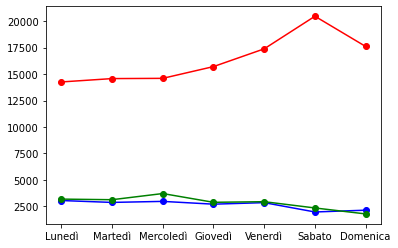

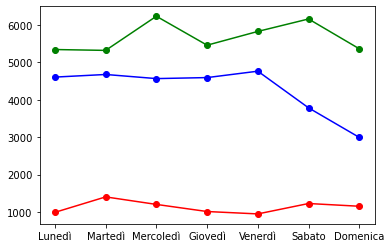

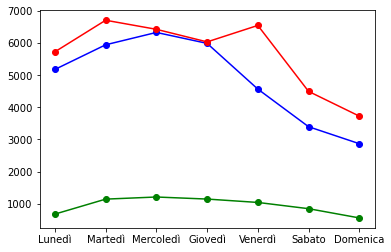

<Figure size 432x288 with 0 Axes>

In [163]:
########## 4.2: STUDY OF THE FLUXES OF THE MOSTLY CONTRIBUTING PROVINCES BASED ON THE DAY OF THE WEEK #########


#DATA OF THE REGIONS OF INTEREST

#Returns a dataset with all the info (data_day_od) of the regions of interest
def data_regions(data_day_od, cod_all_prov):
    data_reg=data_day_od[data_day_od['COD_PRO'].isin(cod_all_prov)]
    return data_reg

#Define a dictionary with the dataframe for the different regions
data_reg = {} 
for i in range(len(reg)):
    data_reg[reg[i]] = pd.DataFrame(data_regions(data_day_od,d[reg[i]]['COD_PRO'].values[:]))
    
    
#print(data_reg)
#print dataframe
#for i in range(len(reg)):  
#    print(reg[i])
#    print(data_reg[reg[i]])
#    print("\n")


#SELECTION OF THE PROVINCES THAT ARE MOSTLY CONTRIBUTING BASED ON THE FLOW 

#Functions that finds the mostly contributing provinces for each region:
#calculate the total flux for each province and returns the code of the selected provinces
def flow_province(data_regions):
    flow_province=data_regions.groupby('COD_PRO').FLOW.sum()
    flow_sorted=flow_province.sort_values(ascending=False)
    #flow_selected=flow_sorted.loc[flow_sorted[:] >= 1e4].reset_index()
    flow_selected=flow_sorted.head(n=3).reset_index()
    cod_pro_selected=flow_selected['COD_PRO'].values[:]
    return flow_selected, cod_pro_selected

d_flow_province = {} #for function output
cod_pro_selected={} #for function output
flow_pro={} #to built a dictionary with a flow dataframe for the different regions
pro_selected={}  #to built a dictionary with the code of the selected provinces

for i in range(len(reg)): 
    d_flow_province, cod_pro_selected = flow_province(data_reg[reg[i]]) #function returns two different outputs
    flow_pro[reg[i]]= d_flow_province
    pro_selected[reg[i]]=cod_pro_selected
    

#Associating each province code the province name
#flow of the province for a region flow_pro[reg[i]]: 'COD PRO', 'NAME', 'FLOW'

for i in range(len(reg)):
    name_l=[]
    for cod in flow_pro[reg[i]]['COD_PRO'].values[:]:
        if cod in d[reg[i]]['COD_PRO'].values[:]:
            where=np.argwhere(d[reg[i]]['COD_PRO'].values[:]==cod)
            idx=where[0][0] #torna poco questo 00
            name=d[reg[i]]['PROVINCIA'].values[idx:idx+1][0]
            name_l.append(name)
    print(reg[i])
    flow_pro[reg[i]].insert(1, "NAME", name_l)
    print(flow_pro[reg[i]])
    print()
    print("\n")
    
    

#STUDY OF THE FLUXES BASED ON THE DAY OF THE WEEK

#Function that returns a dataframe with all the info (data_day_od solo) fro the selected provinces for each region
def data_selected_province(data_day_od,cod_pro_selected):
    data_province_selected=data_day_od[data_day_od['COD_PRO'].isin(cod_pro_selected)] #PROBLEMI!!!
    return data_province_selected

#Define a dictionary with a dataframe for the different regions, containg all the info of the selected provinces 
d_selected_province = {} 
for i in range(len(reg)):
    d_selected_province[reg[i]] = pd.DataFrame(data_selected_province(data_day_od,flow_pro[reg[i]]['COD_PRO'].values[:]))
    
#print(d_selected_province)


#Sum of the fluxes based on the day of the week and the province
def flow_days(data_province_selected, cod_pro_selected):
    flow_days=data_province_selected.groupby(['DOW', 'COD_PRO']).FLOW.sum().reset_index()
    #flow_sorted=flow_days['FLOW'].sort_values(ascending=False)
    #flow_selected=flow_sorted.loc[flow_sorted[:] >= 1e4]
    #flow_selected= flow_sorted.head(n=3)
    return flow_days

#Define a dictionary with a dataframe 
d_flow_days = {} 

for i in range(len(reg)):
    d_flow_days[reg[i]] = pd.DataFrame(flow_days(d_selected_province[reg[i]],flow_pro[reg[i]]['COD_PRO']))


#Priting the dataframe associating the name to each province code

for i in range(len(reg)):
    name_list=[]
    for cod in d_flow_days[reg[i]]['COD_PRO'].values[:]:
        if cod in d[reg[i]]['COD_PRO'].values[:]:
            where=np.argwhere(d[reg[i]]['COD_PRO'].values[:]==cod)
            idx=where[0][0] #torna poco questo 00
            name=d[reg[i]]['PROVINCIA'].values[idx:idx+1][0]
            name_list.append(name)  
    #print(reg[i])
    d_flow_days[reg[i]].insert(1, "Name", name_list)
    #print(d_flow_days[reg[i]])
    print("\n")



#sort values
#print(flow_days_lombardia.sort_values(by='FLOW',ascending=False))
#print(flow_days_lombardia.sort_values(by='COD_PRO',ascending=False))
print("\n")

#Analysis based on the days

days = ['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica']

#Function to order the dataset based on the days of the week 
def days_order(dataset,days):
    dataset['DOW']=pd.Categorical(dataset['DOW'], categories=days, ordered=True)
    dataset_days=dataset.sort_values(['DOW'])
    return dataset_days

#Function to sort the data by provinces
def sort(dataset):
    dataset=dataset.sort_values(['COD_PRO', 'Name'],ascending=False)
    #dataset['DOW']=pd.Categorical(dataset['DOW'], categories=days, ordered=True)
    #dataset_days=dataset.sort_values(['DOW'])
    return dataset

#Define a dictionary cointaing a dataframe for each regions 
#Different dataframes based on different type of data organization
flow_each_pro={}

for i in range(len(reg)):
    flow_each_pro[reg[i]]=sort(d_flow_days[reg[i]])
    for d in range(0,len(flow_each_pro[reg[i]]),7):
        flow_each_pro[reg[i],d//7]= pd.DataFrame(days_order(flow_each_pro[reg[i]][d:d+7],days))
    flow_each_pro[reg[i]]=pd.DataFrame(days_order(d_flow_days[reg[i]],days))

#Data for a region, sorted by days of the week and diveded by provinces 
print(flow_each_pro[reg[0]]) 

#Data for a single province, sorted by the days of the week
print(flow_each_pro[reg[0],2]) 

for i in range(len(reg)):
    for k in range(3):
        color=['b','g','r']
        plt.plot(flow_each_pro[reg[i],k]['DOW'],flow_each_pro[reg[i],k]['FLOW'], marker='o', color=color[k])
    plt.figure()
    
    